In [1]:
#Importing libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

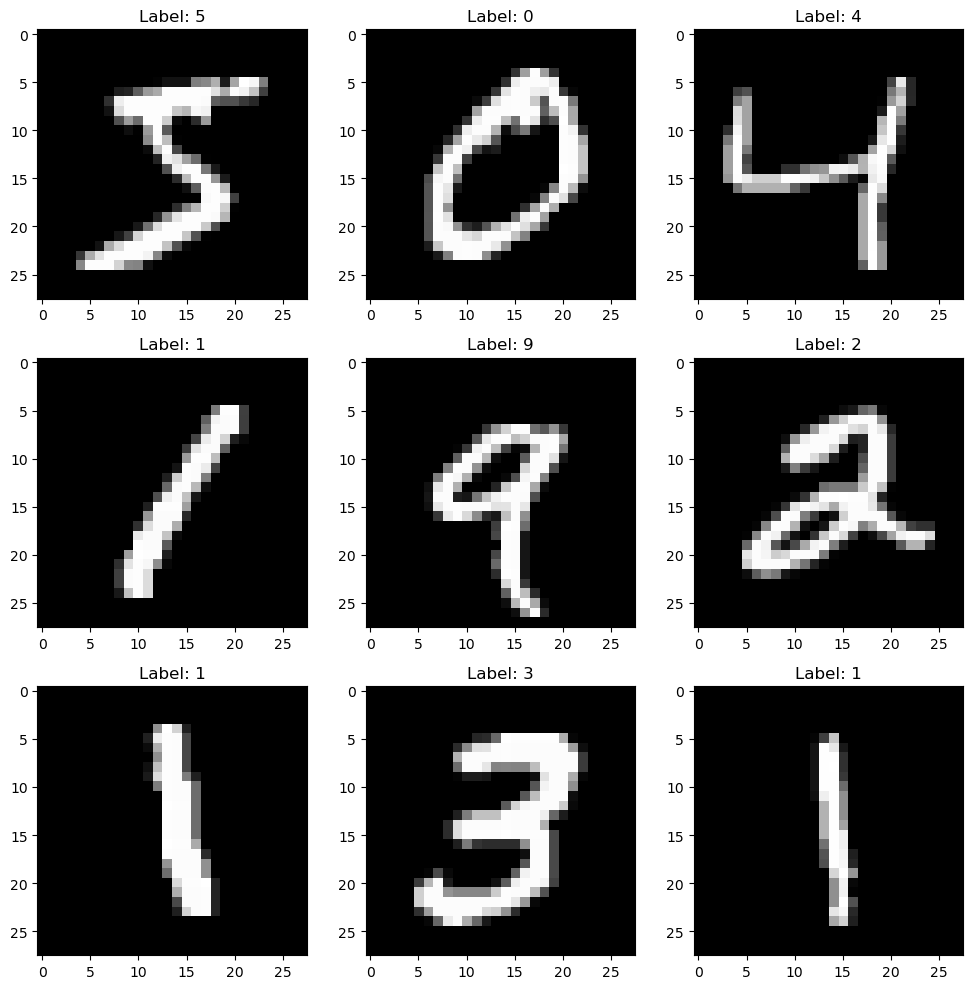

In [3]:
#Printing the image data

# Define the number of images you want to display
num_images = 9

# Define the number of rows and columns for the grid
num_rows = 3
num_cols = 3

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('on')

plt.tight_layout()
plt.show()

In [4]:
#Preprocessing the data

#Reshaping the images to a dimension of 28x28 pixels
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Normalizing the images
x_train = x_train/255
x_test = x_test/255

#One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [6]:
#Function to plot training and validation curves
def training_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(history.history['loss']))

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()
    return None

In [7]:
#Building the model architecture
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
#model.add(Dropout(0.2)) #The model tends to overfit upon adding dropout
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
#Compiling the model
model.compile(loss=keras.metrics.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
#Model summary
model.summary()

print("\n\n")

#Fitting the model
history = model.fit(x_train,
              y_train,
              batch_size=128,
              epochs=12,
              verbose=1,
              validation_data=(x_test, y_test))

#Saving the model
model.save("LeNet_MNIST.keras")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

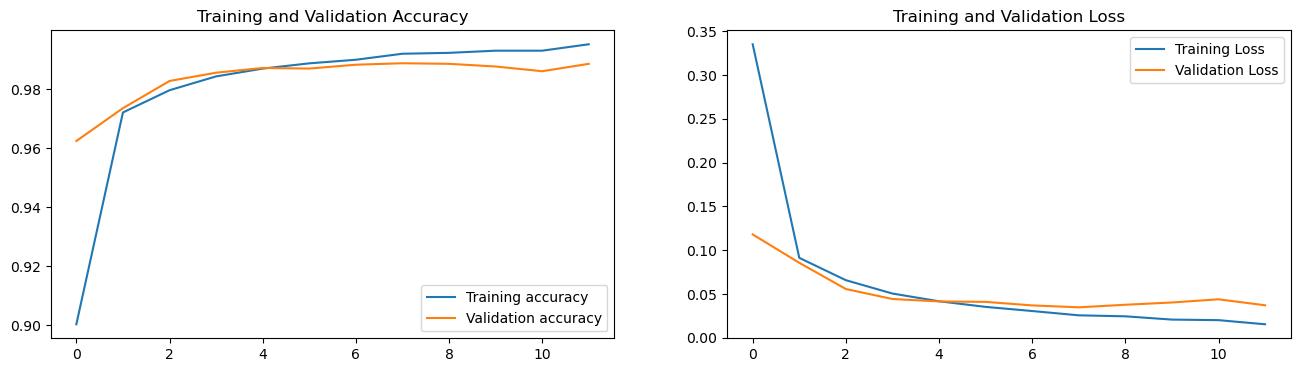

In [10]:
#Train and validation plots
training_history(history)

In [11]:
#Evaluating the model
score = model.evaluate(x_test, y_test)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0372 - accuracy: 0.9885
Test Loss:  0.03720276057720184
Test Accuracy:  0.9884999990463257


Let's test the model on a real image

In [12]:
#Importing necessary packages
import numpy as np
import cv2
from keras.models import load_model

In [13]:
#Loading external image to classify
image_path = "handwritten_digit.jpg"

In [14]:
#Loading and preprocessing the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) #Converting to grayscale

#Resizing the image to 28X28 pixels
img = cv2.resize(img, (28,28))

#Inverting the image (Flipping the color of the background and foreground)
img = cv2.bitwise_not(img)

#Normalizing the image
img = img.astype('float32')/255.0

#Reshaping the image to match the input shape of the model
img = img.reshape(1, 28, 28, 1) #(batch_size, height, width, num_channels)

In [15]:
#Loading the pre-trained model
model = load_model('LeNet_MNIST.keras')

In [16]:
#Predicting the class of the image
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 161ms/step


In [17]:
#Displaying the result
print(f'The predicted class is: {predicted_class}')

The predicted class is: 5


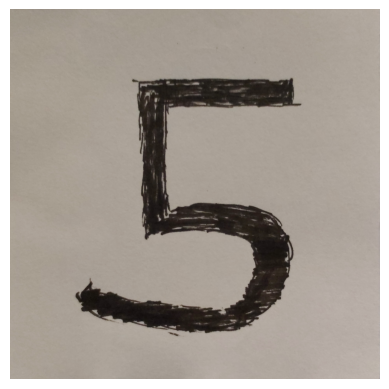

In [18]:
#Displaying the original image 
image = cv2.imread(image_path)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

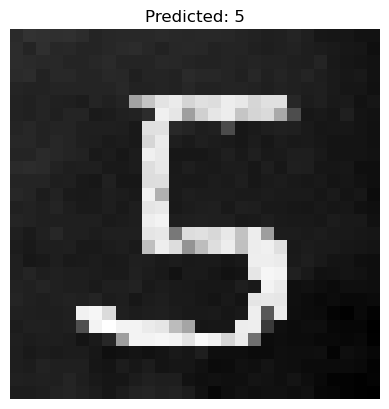

In [19]:
#Displaying the preprocessed image 
plt.imshow(img.reshape(28,28), cmap='gray')
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()